In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like # path fo is_list_like has been changed
from pandas_datareader import data
import numpy as np
# import qgrid

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
from yahoofinancials import YahooFinancials
import pandas as pd

# Select Tickers and stock history dates
ticker = 'AAPL'
ticker2 = 'MSFT'
ticker3 = 'INTC'
index = '^NDX'
freq = 'daily' # 'daily', 'weekly', or 'monthly'
start_date = '2012-10-01'
end_date = '2017-10-01'


# Function to clean data extracts
def clean_stock_data(stock_data_list):
    new_list = []
    for rec in stock_data_list:
        if 'type' not in rec.keys():
            new_list.append(rec)
    return new_list

In [8]:
aapl_financials = YahooFinancials(ticker)
mfst_financials = YahooFinancials(ticker2)
intl_financials = YahooFinancials(ticker3)
index_financials = YahooFinancials(index)

# Clean returned stock history data and remove dividend events from price history
daily_aapl_data = clean_stock_data(aapl_financials
                                     .get_historical_price_data(start_date, end_date, freq)[ticker]['prices'])
daily_msft_data = clean_stock_data(mfst_financials
                                     .get_historical_price_data(start_date, end_date, freq)[ticker2]['prices'])
daily_intl_data = clean_stock_data(intl_financials
                                     .get_historical_price_data(start_date, end_date, freq)[ticker3]['prices'])
daily_index_data = index_financials.get_historical_price_data(start_date, end_date, freq)[index]['prices']
stock_hist_data_list = [{'NDX': daily_index_data}, {'AAPL': daily_aapl_data}, {'MSFT': daily_msft_data},
                        {'INTL': daily_intl_data}]


In [9]:
AAPL = pd.DataFrame(daily_aapl_data)
AAPL.sort_values('date', ascending =True, inplace=True)

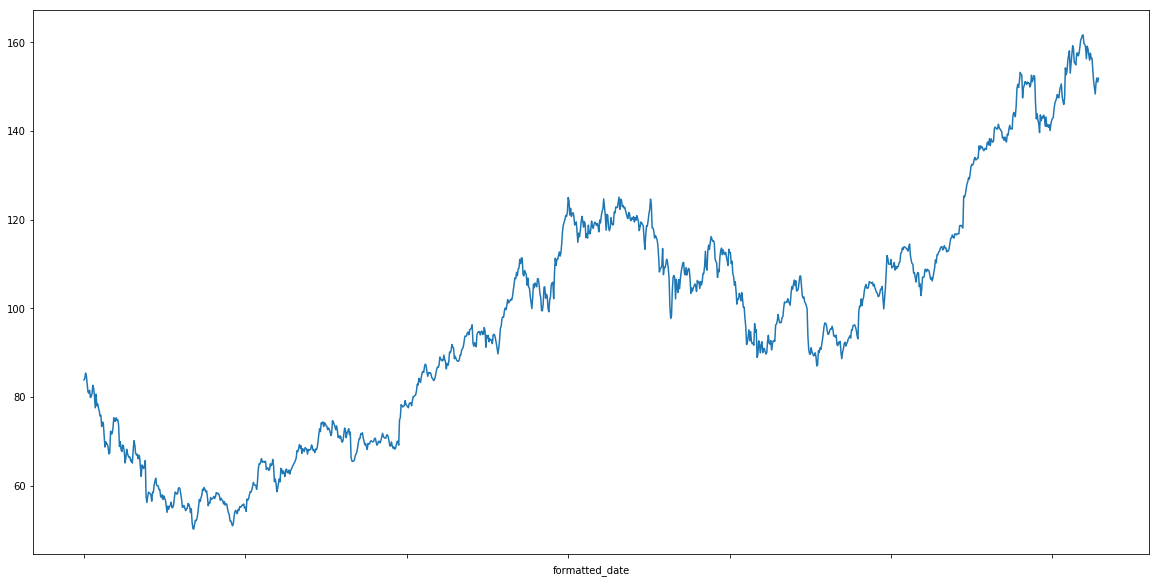

In [10]:
AAPL1 = AAPL.set_index('formatted_date')['adjclose'].plot(figsize=(20,10))
plt.show()

In [8]:
print(qgrid.show_grid(AAPL, show_toolbar=True))

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True, 'boldIndex': True}, id='61d4394e-5140-4ee7-b413-ccffe1387bf3', precision=5, show_toolbar=True)


In [7]:
AAPL

,adjclose,close,date,formatted_date,high,low,open,volume
0,83.842476,94.198570,1349098200,2012-10-01,96.678574,93.785713,95.879997,135898700
1,84.086601,94.472855,1349184600,2012-10-02,95.192856,92.949997,94.544289,156998100
2,85.375900,95.921425,1349271000,2012-10-03,95.980003,94.661430,94.980003,106070300
3,84.784653,95.257141,1349357400,2012-10-04,96.321426,95.078575,95.892860,92681400
4,82.977821,93.227142,1349443800,2012-10-05,95.142860,93.040001,95.028572,148501500
5,81.144318,91.167145,1349703000,2012-10-08,92.508568,90.872856,92.411430,159498500
6,80.849312,90.835716,1349789400,2012-10-09,91.498573,89.078575,91.235718,209649300
7,81.492706,91.558571,1349875800,2012-10-10,92.139999,91.000000,91.391426,127589000
8,79.863892,89.728569,1349962200,2012-10-11,92.457146,89.728569,92.357140,136520300
9,80.068604,89.958572,1350048600,2012-10-12,90.768570,89.328575,89.937141,115003700


In [6]:
# open, high, low, close?? (keep close, because of p.6 fig.)
AAPL2 = np.array(AAPL[['close', 'high', 'low']])

# normalise by closing price
AAPL_n = AAPL2[1:,:]/AAPL2[:-1,:]

def close_high_low(df):
    return np.array(df[['close', 'high', 'low']])

def normalise_price(nparray):
    return nparray[1:,:]/nparray[:-1,:]


In [7]:
data_in = [daily_aapl_data, daily_msft_data ,daily_intl_data, daily_index_data]
data_out = []

for data in data_in:
    temp = pd.DataFrame(data)
    temp.sort_values('date', ascending =True, inplace=True)
    temp = close_high_low(temp)
    temp = normalise_price(temp)
    data_out.append(temp)

In [61]:
a = np.stack(data_out)
b = np.swapaxes(a, 0,2)
b.shape # highlowclose, time, asset

(3, 1257, 4)

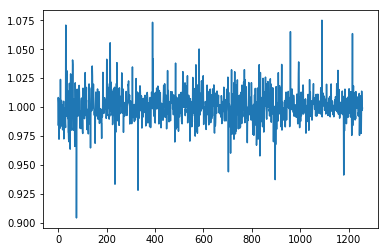

In [60]:
plt.plot(b[1,:,0])
plt.show()

# Get Multiple Stocks

Fact Sheet of IFSL Ravenscroft Huntress Global Blue Chip Fund
http://funds.ifslfunds.com/uploads/documents/15079082705135a52f4be1ce7733eafaa45ce508cf655.pdf

## HUNTRESS GLOBAL BLUE CHIP PORTFOLIO
### GLOBAL BRANDS & EMERGING ECONOMIES
Unilever 5.0% (the company is listed in 4 markets)
Diageo 4.2% (listed in multiple markets)
Walt Disney 4.1%
Kimberly-Clark 4.1%
Nestlé 4.2%
Richmont 3.2%
Procter & Gamble 3.0%
L’Oreal 2.9%
PepsiCo 2.8%
LVMH 2.6%
Colgate 2.4%
### HEALTHCARE
Johnson & Johnson 4.7%
Novartis 5.0%
Roche 5.3%
Sanofi 5.4%
Medtronic 4.7%
Amgen 3.1%
### TECHNOLOGY & INNOVATION
RELX 4.0%
Honeywell 4.0%
Intel 4.2%
Apple 3.5%
General Electric 4.0%
Microsoft 3.5%
3M 2.9%
Rolls- Royce 2.4%
### Cash
Cash 4.8%
### Totals 100%




In [23]:
global_brands_and_emerging_economies = ['UL', 'DEO', 'DIS', 'KMB',
                                        'NSRGY', 'RIC', 'PG', 'LRLCY',
                                       'PEP','LVMUY','CL']
data = []
for ticket in global_brands_and_emerging_economies:
    data.append(YahooFinancials(ticket))
    print(ticket)

UL
DEO
DIS
KMB
NSRGY
RIC
PG
LRLCY
PEP
LVMUY
CL


In [24]:
price = data[0].get_historical_price_data(start_date, end_date, freq)

In [28]:
pd.DataFrame(clean_stock_data(price['UL']['prices']))

,adjclose,close,date,formatted_date,high,low,open,volume
0,30.165630,36.680000,1349098200,2012-10-01,36.889999,36.599998,36.770000,911400
1,30.182079,36.700001,1349184600,2012-10-02,36.799999,36.599998,36.660000,1037600
2,30.239643,36.770000,1349271000,2012-10-03,36.889999,36.709999,36.750000,579500
3,30.585056,37.189999,1349357400,2012-10-04,37.200001,36.970001,37.049999,1530400
4,30.815319,37.470001,1349443800,2012-10-05,37.590000,37.369999,37.450001,750500
5,30.839998,37.500000,1349703000,2012-10-08,37.549999,37.230000,37.250000,2573500
6,30.305431,36.849998,1349789400,2012-10-09,37.240002,36.849998,37.209999,1687800
7,30.256090,36.790001,1349875800,2012-10-10,37.080002,36.740002,36.840000,1103500
8,30.371235,36.930000,1349962200,2012-10-11,37.080002,36.880001,37.000000,968200
9,30.511028,37.099998,1350048600,2012-10-12,37.299999,37.040001,37.220001,874000


KeyboardInterrupt: 